# Take a look at the data set

In [72]:
%env PYTHONHASHSEED=0
%load_ext autoreload
%autoreload 2

env: PYTHONHASHSEED=0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import numpy as np
import pandas as pd
np.random.seed(42)

from tv_show_recommender.data.functions import get_split_data, get_all_data, stratified_shuffle


In [74]:
data = get_all_data()

In [75]:
data.head()

,show_id,user_id,rating,primary_title,start_year,end_year,genres,average_rating,num_votes
0,2402207,2860723,7,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634
1,2402207,22484170,8,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634
2,2402207,11762,7,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634
3,2402207,44112735,5,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634
4,2402207,18044142,2,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517309 entries, 0 to 517308
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   show_id         517309 non-null  int64  
 1   user_id         517309 non-null  int64  
 2   rating          517309 non-null  int64  
 3   primary_title   517309 non-null  object 
 4   start_year      517309 non-null  int64  
 5   end_year        517309 non-null  object 
 6   genres          517309 non-null  object 
 7   average_rating  517309 non-null  float64
 8   num_votes       517309 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 35.5+ MB


In [77]:
# Number of ratings per show
data['show_id'].value_counts()

show_id
11912196    1271
14392248    1271
12004706    1270
9778022     1268
9680440     1268
            ... 
112064         7
3671754        6
88491          4
60019          4
421291         3
Name: count, Length: 1722, dtype: int64

In [78]:
data['genres'].value_counts()

genres
Crime,Drama,Mystery           35428
Action,Adventure,Drama        34027
Action,Crime,Drama            26048
Action,Adventure,Animation    25997
Comedy,Drama                  25023
                              ...  
Adventure,Reality-TV             34
Animation,Sport,Thriller         26
Adventure,Animation,Family       19
Animation,Comedy,Sci-Fi          17
Action,Comedy,Reality-TV         15
Name: count, Length: 219, dtype: int64

In [79]:
data['rating'].value_counts()

rating
10    185257
9      70286
8      55334
1      51401
7      35691
5      26942
6      26760
3      22949
2      22296
4      20393
Name: count, dtype: int64

In [80]:
len(data['user_id'].unique().tolist())

304536

In [81]:
data.describe()

,show_id,user_id,rating,start_year,average_rating,num_votes
count,5.173090e+05,5.173090e+05,517309.000000,517309.000000,517309.000000,5.173090e+05
mean,6.324048e+06,7.289851e+07,7.189774,2015.471981,7.690546,1.327031e+05
std,4.615394e+06,4.612158e+07,3.133158,7.486563,1.030931,2.208649e+05
min,4.320800e+04,1.100000e+01,1.000000,1951.000000,1.100000,7.010000e+02
25%,2.249007e+06,3.208508e+07,5.000000,2014.000000,7.300000,2.360700e+04
50%,5.834204e+06,6.851950e+07,8.000000,2018.000000,7.900000,5.534500e+04
75%,9.288030e+06,1.118937e+08,10.000000,2020.000000,8.400000,1.408200e+05
max,2.885718e+07,1.732340e+08,10.000000,2023.000000,9.500000,2.224679e+06


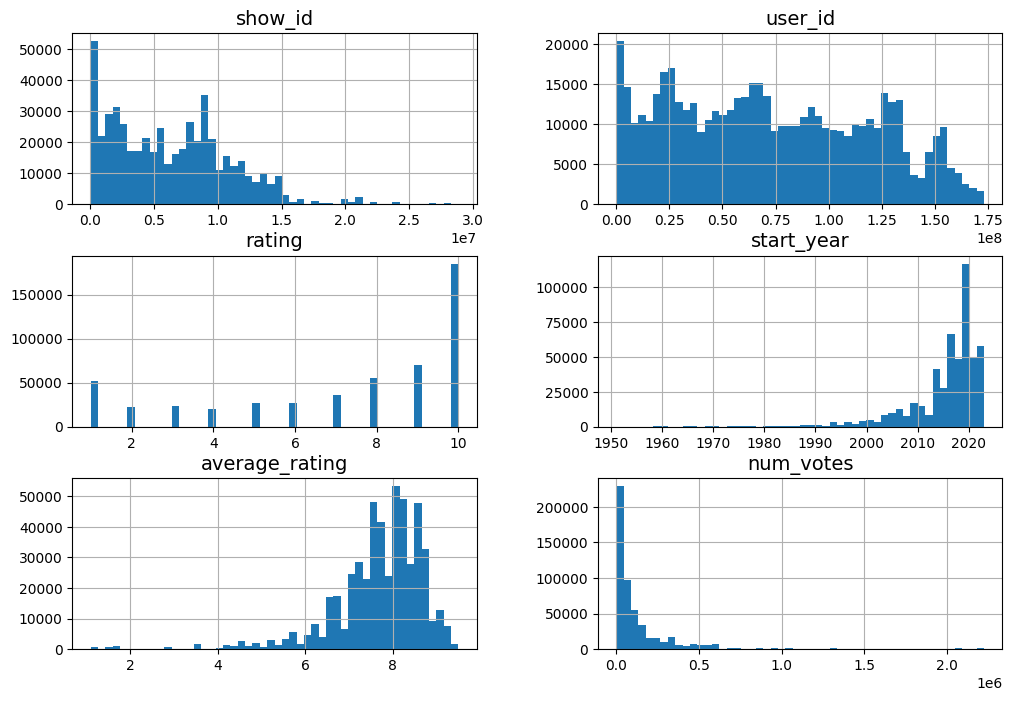

In [82]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

In [83]:
train_set, test_set = get_split_data(0.2)

In [84]:
len(train_set)

413848

In [85]:
len(test_set)

103461

In [86]:
print(f"{train_set.iloc[0].show_id} {train_set.iloc[1].show_id}")

4354880 4955642


<Axes: >

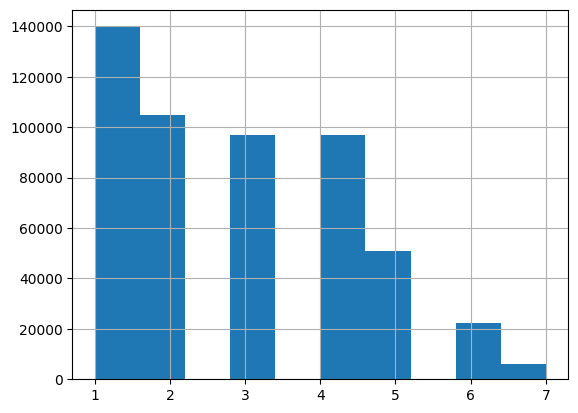

In [87]:
data['popularity'] = pd.cut(data['num_votes'], bins=[0, 25000, 50000, 100000, 250000, 500000, 1000000, np.inf], labels=[1, 2, 3, 4, 5, 6, 7])
data['popularity'].hist()

In [88]:
# Uniformly shuffle our data so that the sets have an equal distribution of popular and unpopular shows
# If we had one with all the popular shows and the other without, that would skew our model or our validation

strat_train_set, strat_test_set = stratified_shuffle(data, "popularity")

strat_test_set["popularity"].value_counts() / len(strat_test_set)

popularity
1    0.269896
2    0.202267
3    0.187663
4    0.187093
5    0.098239
6    0.043456
7    0.011386
Name: count, dtype: float64

In [89]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("popularity", axis=1, inplace=True)

# Visualize the data

In [90]:
data = strat_train_set.copy()

<Axes: xlabel='average_rating', ylabel='num_votes'>

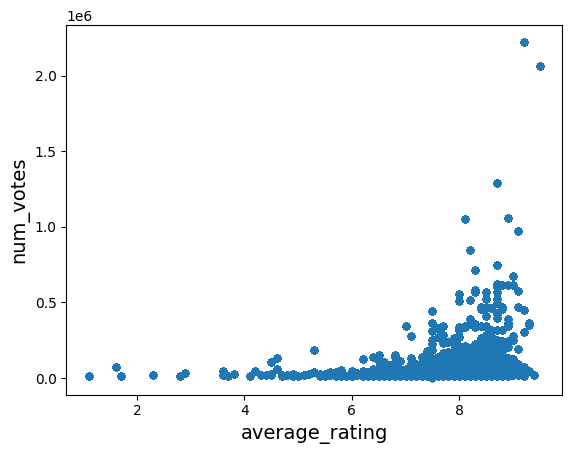

In [91]:
data.plot(kind="scatter", x="average_rating", y="num_votes")

In [92]:
corr_matrix = data.drop(["genres", "primary_title", "end_year"], axis=1).corr()

corr_matrix["rating"].sort_values(ascending=False)

rating            1.000000
average_rating    0.314931
user_id           0.107438
num_votes         0.056437
show_id          -0.029434
start_year       -0.106700
Name: rating, dtype: float64

array([[<Axes: xlabel='average_rating', ylabel='average_rating'>,
        <Axes: xlabel='start_year', ylabel='average_rating'>,
        <Axes: xlabel='num_votes', ylabel='average_rating'>],
       [<Axes: xlabel='average_rating', ylabel='start_year'>,
        <Axes: xlabel='start_year', ylabel='start_year'>,
        <Axes: xlabel='num_votes', ylabel='start_year'>],
       [<Axes: xlabel='average_rating', ylabel='num_votes'>,
        <Axes: xlabel='start_year', ylabel='num_votes'>,
        <Axes: xlabel='num_votes', ylabel='num_votes'>]], dtype=object)

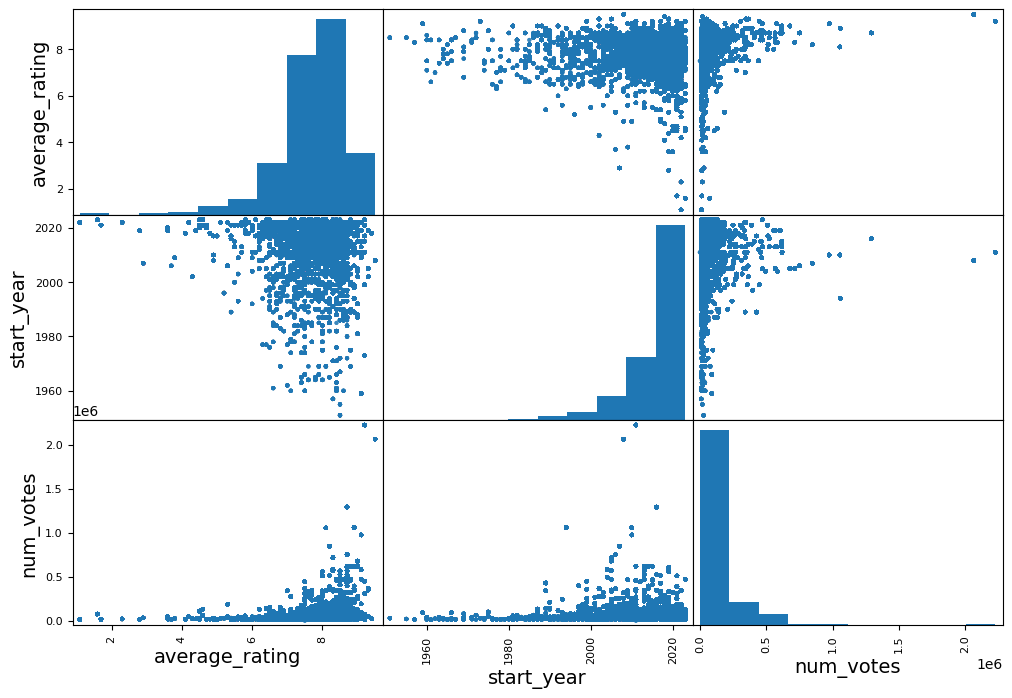

In [93]:
from pandas.plotting import scatter_matrix

attributes = ["average_rating", "start_year", "genres", "num_votes"]

scatter_matrix(data[attributes], figsize=(12, 8))

# Preparing data for our algorithms

In [94]:
# Let's generate (to start): { user_id, show_id, is_liked }
# If that doesn't work, consider adding other features: is_$GENRE, is_popular

data = strat_train_set.copy()

data_ratings = data[["rating"]]
data_ratings.value_counts()

rating
10        148115
9          56305
8          44108
1          41183
7          28644
5          21577
6          21513
3          18294
2          17859
4          16249
Name: count, dtype: int64

In [95]:
from sklearn.pipeline import Pipeline
from tv_show_recommender.transformers import AddIsLikedAttribute, DropColumns

add_is_liked_attr = AddIsLikedAttribute()
drop_columns = DropColumns(columns_to_drop=['rating', 'primary_title', 'start_year', 'end_year', 'genres', 'average_rating', 'num_votes'])

pipeline = Pipeline([
    ('add_is_liked_attr', add_is_liked_attr),
    ('drop_columns', drop_columns),
])

data_prepared = pipeline.fit_transform(data)

data_prepared.head()


,show_id,user_id,is_liked
160700,19854762,48134010,0
8280,1236246,33704671,1
135037,9077540,3589319,0
76913,5555260,163393781,1
380662,5164196,94117410,1


# Select and train a model

In [114]:
from sklearn.neighbors import NearestNeighbors

data_processed = data_prepared.drop_duplicates(subset=['user_id', 'show_id'])
# We want each row to be the user's ratings for a particular show such that we can feed a new "user_row"
# with their preferences into the prediction algorithm
show_user_df = data_processed.pivot(index='user_id', columns='show_id', values='is_liked').fillna(0)

show_user_df.head()


show_id,43208,47708,50051,52520,53479,53488,53502,54533,55683,56751,...,22014226,22074164,22185582,22297578,22373148,23037654,23900194,26693803,28227737,28857177
user_id,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(show_user_df.T)


NearestNeighbors(algorithm='brute', metric='cosine')

In [117]:
# The Wire
show_id = 306414
liked_shows = [show_id]
similar_shows_indices = []

show_index = show_user_df.columns.get_loc(show_id)
show_is_liked_series = show_user_df.iloc[:, show_index]

# print(show_is_liked_series)

show_is_liked_values = show_is_liked_series.values.reshape(1, -1)

# print(show_is_liked_values)

distances, indices = knn.kneighbors(show_is_liked_values, n_neighbors=3)
similar_shows_indices = indices.flatten().tolist()
similar_show_ids = show_user_df.columns[similar_shows_indices]

# print(similar_show_ids)
# => The Sopranos, Breaking Bad


user_id
11           0.0
39           0.0
436          0.0
1414         0.0
2043         0.0
            ... 
173190020    0.0
173197658    0.0
173210143    0.0
173221947    0.0
173233959    0.0
Name: 306414, Length: 255608, dtype: float64
[[0. 0. 0. ... 0. 0. 0.]]


In [130]:
# How about multiple shows?

# The Wire, DS9, The Sopranos
liked_shows = [306414, 106145, 141842]
similar_shows_indices = []
liked_shows_indices = []

for show_id in liked_shows:
    show_index = show_user_df.columns.get_loc(show_id)
    liked_shows_indices.append(show_index)

liked_shows_subset = show_user_df[liked_shows]
liked_shows_subset_transposed = liked_shows_subset.T


distances, indices = knn.kneighbors(liked_shows_subset_transposed, n_neighbors=3)

# Rank based on distance
similar_shows_indices = indices.flatten().tolist()
similar_show_ids = show_user_df.columns[similar_shows_indices]
similar_distances = distances.flatten()

similar_shows_with_distances = dict(zip(similar_show_ids, similar_distances))
sorted_similar_shows = sorted(similar_shows_with_distances.items(), key=lambda x: x[1])

sorted_show_ids = [show[0] for show in sorted_similar_shows]
print(similar_show_ids)


Index([306414, 141842, 903747, 106145, 92455, 112178, 141842, 306414, 979432], dtype='int64', name='show_id')


In [115]:
# So...how can we evaluate our algorithms?

# Get our test data
# test_data_prepared = pipeline.fit_transform(strat_test_set)
# test_data_processed = test_data_prepared.drop_duplicates(subset=['user_id', 'show_id'])
# test_user_item_matrix = test_data_processed.pivot(index='user_id', columns='show_id', values='is_liked').fillna(0)
#
# def get_user_vector_for_user(user_id):
#     # TODO: implement me
#     return
#
# def get_user_recommended_shows(user_vector):
#     _, indices = knn.kneighbors(user_vector, n_neighbors=3)
#     similar_shows_indices = []
#     similar_shows_indices.extend(indices.flatten().tolist())
#     similar_shows_indices = list(set(similar_shows_indices) - set(user_item_matrix.columns.get_loc(int(show)) for show in liked_shows))
#     similar_show_ids = user_item_matrix.columns[similar_shows_indices]
#     return similar_show_ids
#
#
# precision_scores = []
# recall_scores = []
# f1_scores = []
# accuracy_scores = []
#
#
# for user_id, data in test_user_item_matrix.groupby("user_id"):
#     user_likes = data.values.reshape(1, -1)
#     print(data.values)
#     recommended_shows = recommend_shows_for_user(user_likes, knn, test_user_item_matrix, top_n=2)
#
#     print(recommended_shows)
#
#     break
#
#     # TODO: retrieve liked shows from train_data
#     actual_liked_shows = []
#
#     # Calculate evaluation metrics
#     precision_scores.append(precision_score(actual_liked_shows, recommended_shows))
#     recall_scores.append(recall_score(actual_liked_shows, recommended_shows))
#     f1_scores.append(f1_score(actual_liked_shows, recommended_shows))
#     accuracy_scores.append(accuracy_score(actual_liked_shows, recommended_shows))
#
# mean_precision = np.mean(precision_scores)
# mean_recall = np.mean(recall_scores)
# mean_f1 = np.mean(f1_scores)
# mean_accuracy = np.mean(accuracy_scores)
#
# print("Mean Precision:", mean_precision)
# print("Mean Recall:", mean_recall)
# print("Mean F1-score:", mean_f1)
# print("Mean Accuracy:", mean_accuracy)

[[0. 0. 0. ... 0. 0. 0.]]


ValueError: X has 1716 features, but NearestNeighbors is expecting 255608 features as input.